### Problem Statement

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Data Dictionary

### 1. Target: Claim Status (Claimed)
### 2. Code of tour firm (Agency_Code)
### 3. Type of tour insurance firms (Type)
### 4. Distribution channel of tour insurance agencies (Channel)
### 5. Name of the tour insurance products (Product)
### 6. Duration of the tour (Duration)
### 7. Destination of the tour (Destination)
### 8. Amount of sales of tour insurance policies (Sales)
### 9. The commission received for tour insurance firm (Commission)
### 10. Age of insured (Age)

### Importing all required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
import os
os.chdir('C:\\Users\\WELCOME\\Downloads\\PYTHON FILES\\4.Data Mining\\Project')

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [3]:
df_insured = pd.read_csv("insurance_part2_data-2.csv")

### Checking the data

In [4]:
df_insured.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df_insured.shape

(3000, 10)

In [6]:
df_insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


### Check for missing value in any column

In [7]:
df_insured.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

### Summary of the data

In [9]:
df_insured.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for duplicate data

In [10]:
dups = df_insured.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


### Removing Duplicates

In [12]:
df_insured.drop_duplicates(inplace=True)

In [13]:
dups = df_insured.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_insured.shape)

Number of duplicate rows = 0
(2861, 10)


### Checking for Outliers

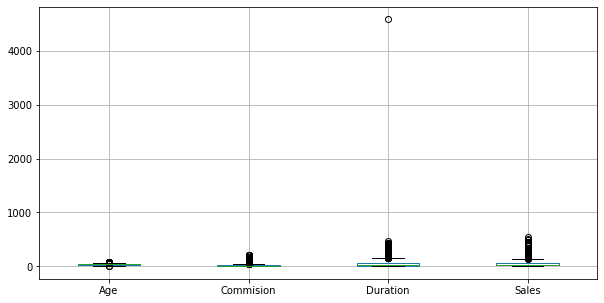

In [18]:
plt.figure(figsize=(10,5))
df_insured[['Age','Commision', 'Duration', 'Sales']].boxplot()

### Checking pairwise distribution of the continuous variables

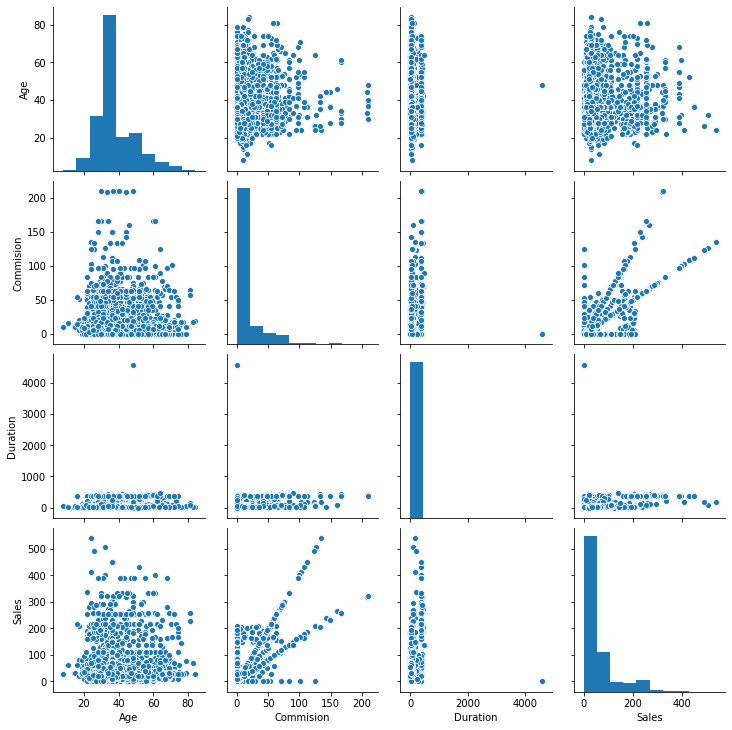

In [19]:
sns.pairplot(df_insured[['Age','Commision', 'Duration', 'Sales']])

### Checking for Correlations

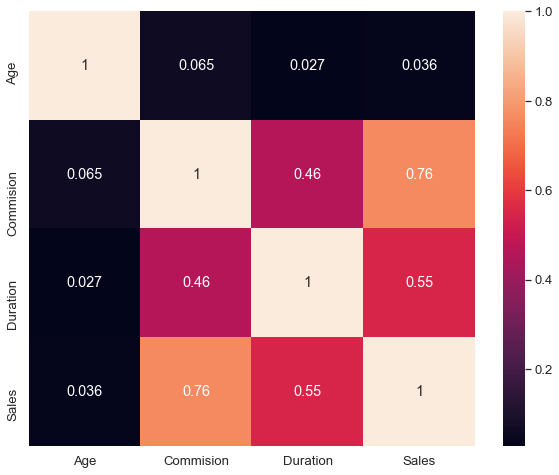

In [20]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df_insured[['Age','Commision', 'Duration', 'Sales']].corr(), annot=True)

### Converting all objects to categorical codes

In [22]:
for feature in df_insured.columns: 
    if df_insured[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_insured[feature].unique()))
        print(pd.Categorical(df_insured[feature].unique()).codes)
        df_insured[feature] = pd.Categorical(df_insured[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [23]:
df_insured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


In [24]:
df_insured.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### Proportion of 1s and 0s

In [25]:
df_insured.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

### Extracting the target column into separate vectors for training set and test set

In [28]:
X = df_insured.drop("Claimed", axis=1)

y = df_insured.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Splitting data into training and test set

In [29]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [30]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


### Building a Decision Tree Classifier

In [32]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [33]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [34]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.191728
Agency_Code   0.168361
Type          0.001543
Commision     0.081860
Channel       0.003908
Duration      0.270461
Sales         0.216325
Product Name  0.036831
Destination   0.028983


In [35]:
train_char_label = ['No', 'Yes']
insurance_prediction_Tree_File = open('C:\Users\WELCOME\Downloads\PYTHON FILES\4.Data Mining\Project\insurance_prediction.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=insurance_prediction_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_prediction_Tree_File.close()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-35-bcf6f659d04d>, line 2)